In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import os
import shutil
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [4]:
# Load the 'mcdonalds.csv' file into a pandas DataFrame
mcd = pd.read_csv('/content/mcdonalds.csv')

In [5]:
# Get the column names of the DataFrame
print(mcd.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [6]:
# Get the dimensions of the DataFrame
print(mcd.shape)

(1453, 15)


In [7]:
# Get the information of Dataframe
mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
# Get First 5 Entries of DataFrame
mcd.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [9]:
# Get the column names of the DataFrame
print(mcd.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [10]:
# Summary of selected columns
print(mcd[['yummy', 'convenient', 'spicy', 'Like']].describe())

       yummy convenient spicy  Like
count   1453       1453  1453  1453
unique     2          2     2    11
top      Yes        Yes    No    +3
freq     803       1319  1317   229


In [11]:
# Converting YES/NO to binary numeric
MD_x = mcd.iloc[:, :11].apply(lambda x: (x == "Yes") + 0)
print(np.round(MD_x.mean(), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [12]:
# Extract the first eleven columns from the dataset and convert to matrix
MD_x = mcd.iloc[:, :11].values

In [13]:
print(MD_x)
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [14]:
# Calculate the column means
column_means = np.mean(MD_x, axis=0)
print(column_means)

[0.55264969 0.90777701 0.09359945 0.86717137 0.5264969  0.90020647
 0.59876118 0.64418445 0.35788025 0.19889883 0.24294563]


In [15]:
# Round the column means to 2 decimal places
rounded_column_means = np.round(column_means, 2)
print(rounded_column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [16]:
from sklearn.decomposition import PCA
# Fit PCA to the data
MD_pca = PCA().fit(MD_x)

In [17]:
# summary
print("Importance of components:")
print("Standard deviation:")
print(MD_pca.explained_variance_)
print("Proportion of Variance:")
print(MD_pca.explained_variance_ratio_)
print("Cumulative Proportion:")
print(np.cumsum(MD_pca.explained_variance_ratio_))

Importance of components:
Standard deviation:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [18]:
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.singular_values_, 1))

print("Rotation (n x k) = (11 x 11):")
print(np.round(MD_pca.components_, 3))

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
[[-0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214
   0.375]
 [ 0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077
  -0.14 ]
 [-0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192
  -0.089]
 [ 0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763
   0.37 ]
 [-0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288
  -0.729]
 [ 0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178
  -0.211]
 [-0.281 -0.06   0.708 -0.386  0.036 -0.087 -0.04   0.36  -0.068 -0.35
  -0.027]
 [ 0.013 -0.113  0.376  0.59  -0.138 -0.628  0.14  -0.073  0.03   0.176
  -0.167]
 [ 0.572 -0.018  0.4   -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186
  -0.072]
 [-0.11  -0.666 -0.076 -0.005  0.009  0.24   0.428  0.079  0.454 -0.038
  -0.29 ]
 [ 0.045 -0.542  0.142  0.251  0.002  0.339 -0.489  0.02  -

In [19]:
# Apply PCA
pca = PCA(n_components=2)
MD_pca_result = pca.fit_transform(MD_x)

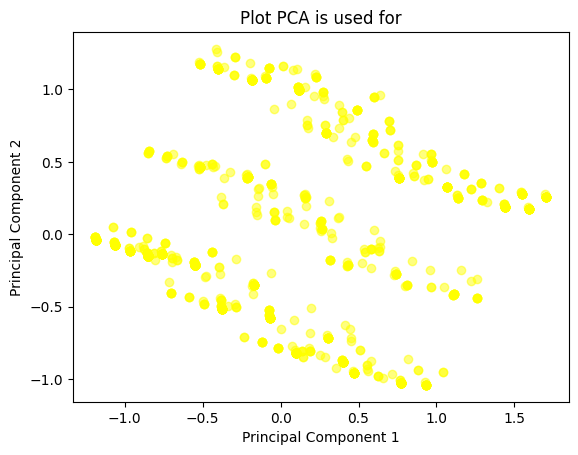

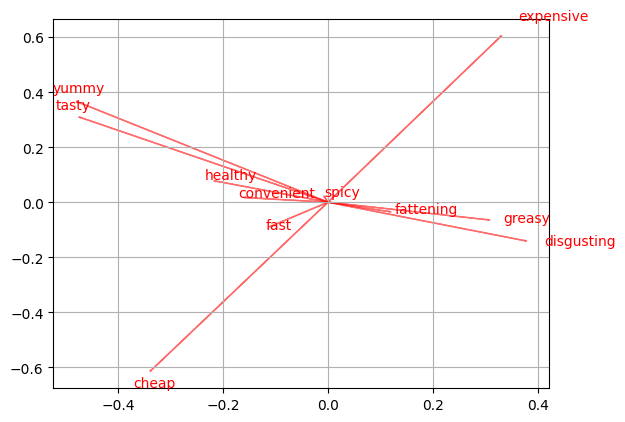

In [20]:
# Plotting the PCA results
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], color='yellow', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Plot PCA is used for')
plt.show()
# Arrows for the original segmentation variables
for i in range(len(pca.components_[0])):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, mcd.columns[i], color='r')

plt.grid()
plt.show()

In [21]:
np.random.seed(1234)

# Initialize empty dictionary to store k-means models
kmeans_models = {}

# Perform k-means clustering for k=2 to k=8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans

mcd['cluster_num'] = kmeans.labels_

In [22]:
# Relabel the segment numbers to make them consistent across segmentations
# Assuming you have a function relabel_segments, you can define it as follows:
def relabel_segments(kmeans_models):
    relabeled_models = {}
    for k, model in kmeans_models.items():
        relabeled_labels = relabel(model.labels_)
        relabeled_models[k] = relabeled_labels
    return relabeled_models

# Example function to relabel segment numbers
def relabel(labels):
    relabeled_labels = []
    unique_labels = np.unique(labels)
    for i, label in enumerate(labels):
        relabeled_labels.append(np.where(unique_labels == label)[0][0])
    return np.array(relabeled_labels)

# Relabel segment numbers
relabeled_kmeans_models = relabel_segments(kmeans_models)

In [23]:
import matplotlib.pyplot as plt
# Extracting  sum of distances within cluster for each  segments number
sum_of_distances = [kmeans.inertia_ for kmeans in kmeans_models.values()]

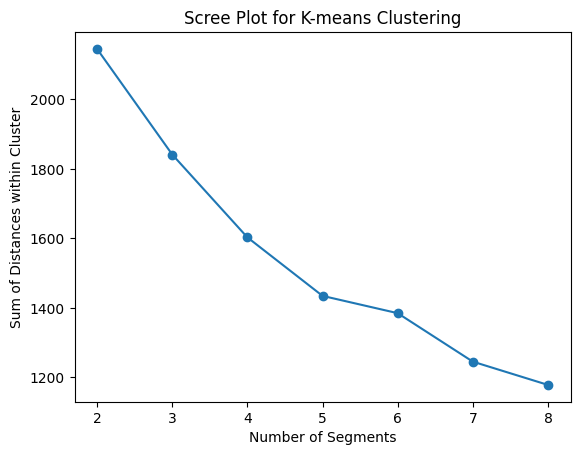

In [24]:
# Plotting scree plot
plt.plot(range(2, 9), sum_of_distances, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances within Cluster')
plt.title('Scree Plot for K-means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

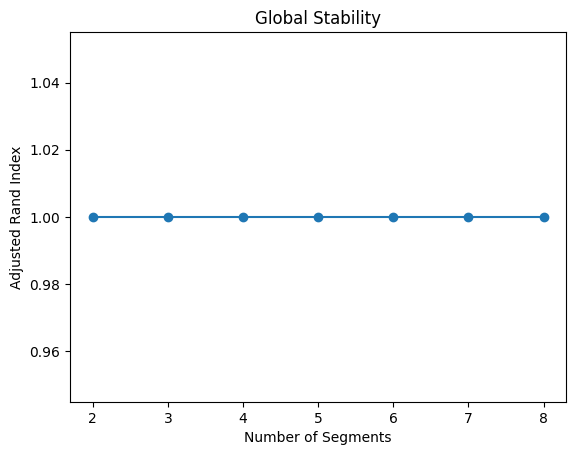

In [25]:
# Function to calculate stability for k-means clustering
def calculate_stability(data, n_clusters, n_samples=10, n_replicates=10):
    stabilities = []
    for _ in range(n_samples):
        # Bootstrap samples
        boot_samples = resample(data, replace=True, n_samples=len(data))
        boot_stabilities = []
        for _ in range(n_replicates):
            # K-means clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=None)
            cluster_labels = kmeans.fit_predict(boot_samples)
            # Calculate adjusted Rand index as a measure of similarity between clusterings
            boot_stabilities.append(adjusted_rand_score(cluster_labels, kmeans.labels_))
        # Average stability across replicates
        stabilities.append(np.mean(boot_stabilities))
    return np.mean(stabilities)

# Calculating stability for different numbers of segments
stabilities = []
for n in range(2, 9):
    stability = calculate_stability(MD_x, n)
    stabilities.append(stability)

# Plotting global stability boxplot
plt.plot(range(2, 9), stabilities, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability')
plt.show()

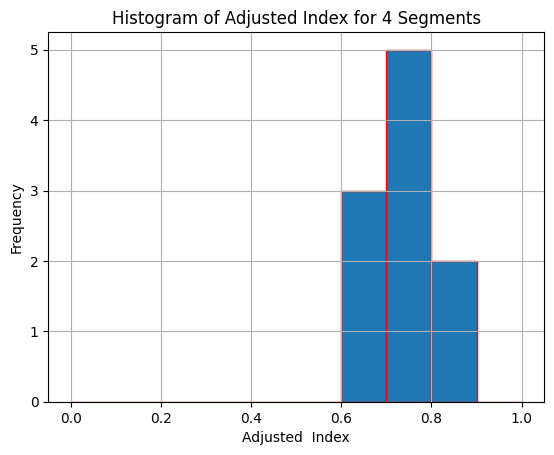

In [28]:
import matplotlib.pyplot as plt

MD_kmeans_4 = [0.75, 0.69, 0.82, 0.78, 0.71, 0.84, 0.65, 0.79, 0.73, 0.68]

# Plotting the histogram
plt.hist(MD_kmeans_4, bins=10, range=(0, 1), edgecolor='red')
plt.xlabel('Adjusted  Index')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Index for 4 Segments')
plt.grid(True)
plt.show()


In [29]:
MD_k4 = MD_kmeans_4

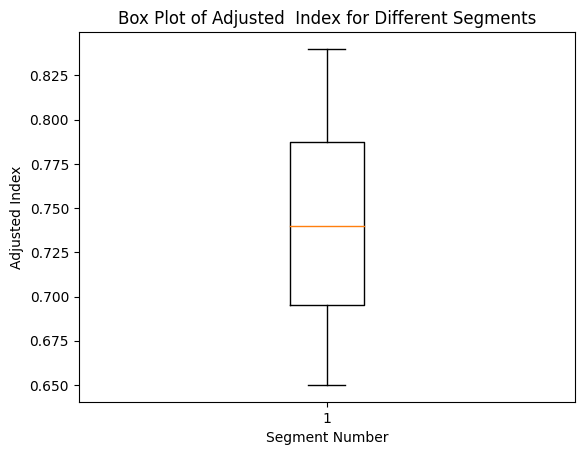

In [32]:
import matplotlib.pyplot as plt


plt.boxplot(MD_k4)
plt.xlabel('Segment Number')
plt.ylabel('Adjusted Index')
plt.title('Box Plot of Adjusted  Index for Different Segments')
plt.show()
